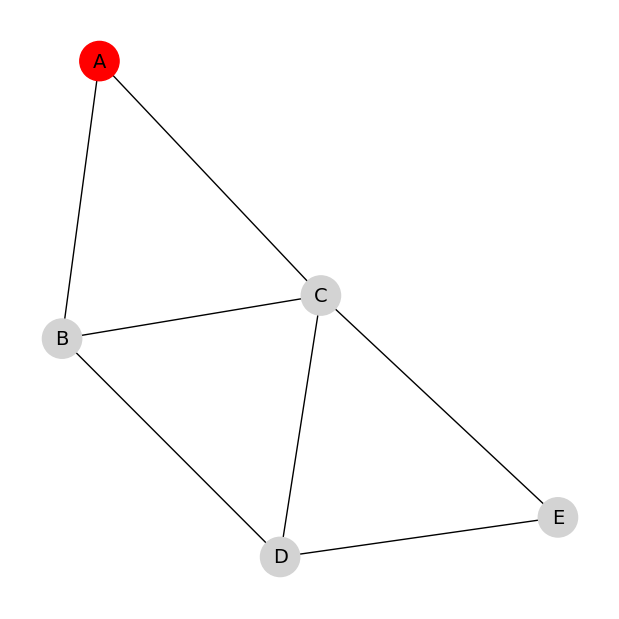

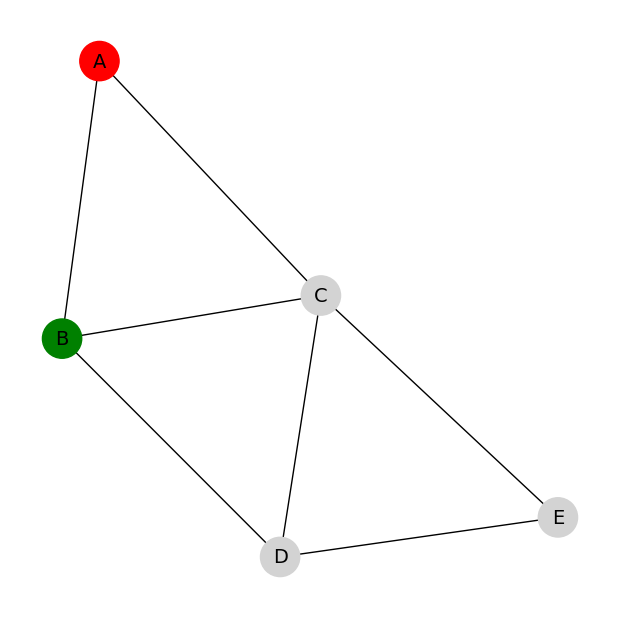

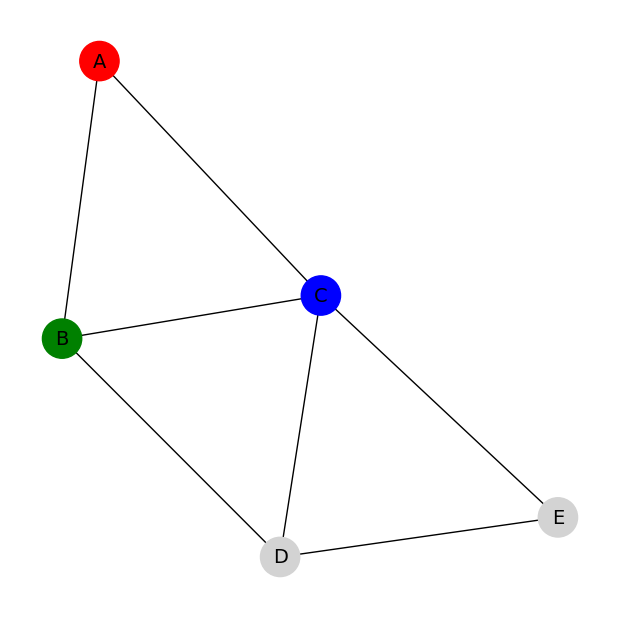

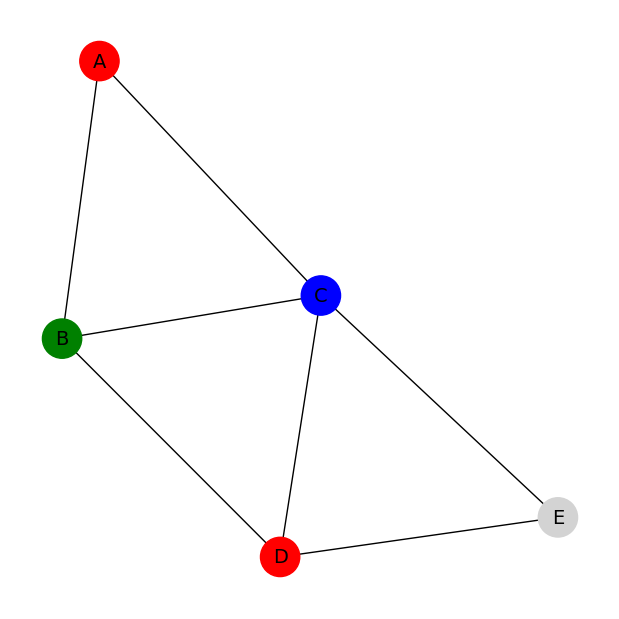

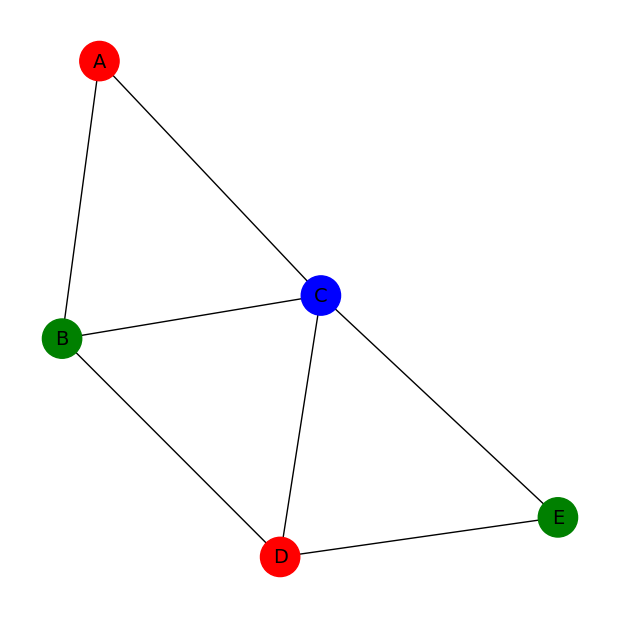

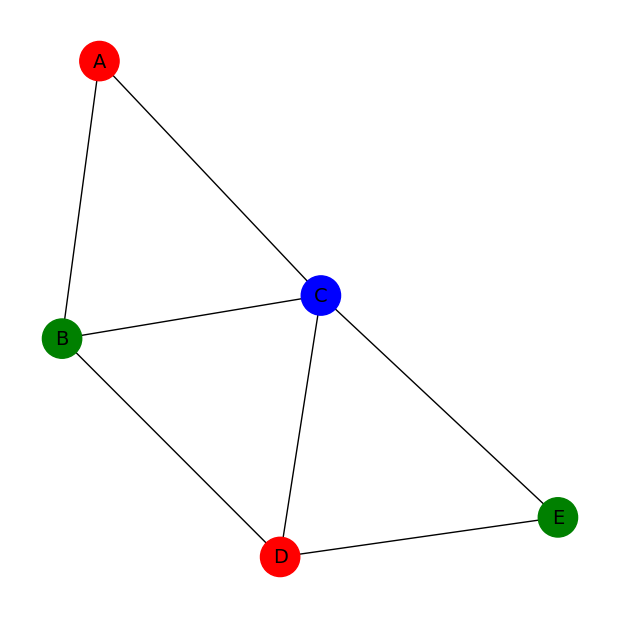

✅ Final Assignment: {'A': 'red', 'B': 'green', 'C': 'blue', 'D': 'red', 'E': 'green'}


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import time

# Map regions and neighbors
neighbors = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D', 'E'],
    'D': ['B', 'C', 'E'],
    'E': ['C', 'D']
}

colors = ['red', 'green', 'blue']
assignment = {}

# Create graph
G = nx.Graph()
for node, nbrs in neighbors.items():
    for n in nbrs:
        G.add_edge(node, n)

pos = nx.spring_layout(G)

def draw_graph():
    node_colors = [assignment.get(node, 'lightgray') for node in G.nodes()]
    plt.figure(figsize=(6,6))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, font_size=14)
    plt.show()
    time.sleep(0.5)

def is_consistent(region, color):
    for neighbor in neighbors[region]:
        if neighbor in assignment and assignment[neighbor] == color:
            return False
    return True

def backtrack():
    if len(assignment) == len(neighbors):
        draw_graph()
        return assignment

    unassigned = [r for r in neighbors if r not in assignment][0]

    for color in colors:
        if is_consistent(unassigned, color):
            assignment[unassigned] = color
            draw_graph()
            result = backtrack()
            if result:
                return result
            del assignment[unassigned]
            draw_graph()  # show backtracking

solution = backtrack()
print("✅ Final Assignment:", solution)
